# Programación para la Bioinformática

Unidad 5: ADN, ARN, secuencias y motivos (Parte 1)
--------------------------------------------------

### Instrucciones de uso
A continuación se presentarán explicaciones y ejemplos de uso de la librería BioPython en el contexto del manejo de secuencias de ADN, ARN y proteínas. Recordad que podéis ir ejecutando los ejemplos para obtener sus resultados.

### Primeros pasos
Como siempre, vamos a importar la librería y comprobar que todo funciona:

In [1]:
import Bio

La información genómica que contiene nucleótidos (o también secuencias de residuos peptídicos, los aminoácidos esenciales que forman las proteínas) suele encontrarse en forma de fichero FASTA. FASTA es un conocido paquete bioinformático y el formato de fichero para secuencias es muy utilizado por la comunidad y casi supone un estándar.

Un fichero FASTA es un simple fichero de texto plano con el siguiente formato:

>`>Identificador_secuencia_1`<br>
>`MTEITAAMVKELRESTGAGMMDCKNALSETNGDFDKAVQLLREKGLGKAAKKADRLAAEG`
>`LVSVKVSDDFTIAAMRPSYLSYEDLDMTFVENEYKALVAELEKENEERRRLKDPNKPEHK`<br>
>`>Identificador_secuencia_2`<br>
>`SATVSEINSETDFVAKNDQFIALTKDTTAHIQSNSLQSVEELHSSTINGVKFEEYLKSQI`
>`ATIGENLVVRRFATLKAGANGVVNGYIHTNGRVGVVIAAACDSAEVASKSRDLLRQICMH`

La primera línea con el símbolo '>' se trata de un comentario en el que habitualmente se incluye algún tipo de identificador. Es posible que esta línea no aparezca puesto que no es obligatoria. A continuación, tenemos la secuencia hasta el próximo símbolo '>' o hasta que el fichero acabe. Habitualmente, las líneas tienen un tamaño inferior a los 80 caracteres (por razones históricas de legibilidad en las antiguas terminales de 80 caracteres de tamaño). En este caso, la secuencia está formada por caracteres en mayúscula que representan los residuos en una proteína: M para metionina, T para treonina, etc. (http://pac.iupac.org/publications/pac/pdf/1972/pdf/3104x0639.pdf).
En el caso de una secuencia genómica, solo tendríamos alguna de las cuatro posibles bases (G, A, T o C) en caso de ADN o bien las mismas bases a excepción de U en vez de T para el ARN. Podemos encontrar saltos de secuencia (símbolo '-') u otros casos. Aquí podéis encontrar una lista más exhaustiva de ellos: https://en.wikipedia.org/wiki/FASTA_format.
En el directorio `data` tenemos un fichero FASTA de ejemplo, `assembledSeqs.fa`. Vamos a leerlo con BioPython:

In [16]:
from Bio import SeqIO

# Obtenemos todas las secuencias que encuentre en el fichero, indicando el 
# tipo de formato 'fasta':
records = SeqIO.parse("data/assembledSeqs.fa", "fasta")
for seq_record in records:
    # Para cada secuencia, imprimiremos su id y su longitud
    print('ID: "', seq_record.id, '" - longitud: ', len(seq_record))

ID: " chr12_9180206_+:chr12_118582391_+:a1;2 " - longitud:  79
ID: " chr12_9180206_+:chr12_118582391_+:a2;2 " - longitud:  80
ID: " chr1_8969882_-:chr1_568670_-:a1;113 " - longitud:  86
ID: " chr1_8969882_-:chr1_568670_-:a2;69 " - longitud:  120


Cada uno de los `seq_record` que leemos es un objeto `SeqRecord` que contiene un objeto de tipo `Seq` (una secuencia en BioPython) junto a otros metadatos, como su id, por ejemplo. Vamos ahora a contar el número de nucleótidos de cada tipo:

In [20]:
from Bio import SeqIO

records = SeqIO.parse("data/assembledSeqs.fa", "fasta")
for i, seq_record in enumerate(records):
    print("Secuencia %d:" % i)
    print("Número de A's: %d" % seq_record.seq.count("A"))
    print("Número de C's: %d" % seq_record.seq.count("C"))
    print("Número de G's: %d" % seq_record.seq.count("G"))
    print("Número de T's: %d" % seq_record.seq.count("T"))
    print()

Secuencia 0:
Número de A's: 14
Número de C's: 17
Número de G's: 24
Número de T's: 24

Secuencia 1:
Número de A's: 17
Número de C's: 30
Número de G's: 16
Número de T's: 17

Secuencia 2:
Número de A's: 27
Número de C's: 31
Número de G's: 12
Número de T's: 16

Secuencia 3:
Número de A's: 31
Número de C's: 41
Número de G's: 20
Número de T's: 28



### Ejercicio 1
Escribid el código para contar el número de bases como el ejemplo anterior, pero **SIN utilizar la librería BioPython**. El output tiene que ser idéntico al del ejemplo anterior.

In [29]:
# Respuesta
import io
import re
fp = open("data/assembledSeqs.fa", "r")
data = fp.read()
regex = re.compile('.*')
records = re.findall(r"(?=[ACTG])([\s\w]*)", data)
print(records)
for i, seq_record in enumerate(records):
    print("Secuencia %d:" % i)
    print("Número de A's: %d" % seq_record.count("A"))
    print("Número de C's: %d" % seq_record.count("C"))
    print("Número de G's: %d" % seq_record.count("G"))
    print("Número de T's: %d" % seq_record.count("T"))
    print()

['TTGGTTTCGTGGTTTTGCAAAGTATTGGCCTCCACCGCTATGTCTGGCTGGTTTACGAGC\nAGGACAGGCCGCTAAAGTG\n', 'CTAACCCCCTACTTCCCAGACAGCTGCTCGTACAGTTTGGGCACATAGTCATCCCACTCG\nGCCTGGTAACACGTGCCAGC\n', 'CACTCATGAGCTGTCCCCACATTAGGCTTAAAAACAGATGCAATTCCCGGACGTCTAAAC\nCAAACCACTTTCACCGCCACACGACC\n', 'TGAACCTACGACTACACCGACTACGGCGGACTAATCTTCAACTCCTACATACTTCCCCCA\nTTATTCCTAGAACCAGGCGACCTGCGACTCCTTGACGTTGACAATCGAGTAGTACTCCCG\n']
Secuencia 0:
Número de A's: 14
Número de C's: 17
Número de G's: 24
Número de T's: 24

Secuencia 1:
Número de A's: 17
Número de C's: 30
Número de G's: 16
Número de T's: 17

Secuencia 2:
Número de A's: 27
Número de C's: 31
Número de G's: 12
Número de T's: 16

Secuencia 3:
Número de A's: 31
Número de C's: 41
Número de G's: 20
Número de T's: 28



#### Notas importantes

- No podeis coger el contenido del fichero y copiar en la celda como si fuera un string.
- Cada nueva secuencia viene identificada por el carácter '>'. Utilizad todo lo que viene después de ese carácter y hasta que acabe la línea para utilizarlo como la clave de un diccionario. El valor para esa clave será el resto de la secuencia que tenéis que tratar.

### Contenido GC
En genética, el contenido de guanina y citosina (GC) se entiende como el porcentaje entre los pares Guanina-Citosina en la molécula de ADN o genoma y el resto de bases. Este porcentaje se calcula de la siguiente forma:

$(G + C) * 100 / (A + C + G + T)$

En BioPython, calcular el contenido GC es muy sencillo:

In [210]:
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
from Bio.SeqUtils import GC

# Creamos un objeto secuencia que contiene los nucleótidos válidos para ADN 
# definidos por la IUPAC (Unión Internacional de Química Pura y Aplicada)
seq = Seq("ACGTGAGATCACATAATAATTGATCGAGTTAATCTGGAAGGGCTTTATTTCCGGGATGTCTTTACTATAAT", IUPAC.unambiguous_dna)

# Calculamos el contenido mediante la función GC():
GC(seq)

35.2112676056338

### Ejercicio 2
Para la misma secuencia, escribid el código para calcular el contenido GC sin utilizar la librería BioPython:

In [223]:
# Respuesta

seq = "ACGTGAGATCACATAATAATTGATCGAGTTAATCTGGAAGGGCTTTATTTCCGGGATGTCTTTACTATAAT"

def calcular_GC(seq):
    total_A = seq.count("A")
    total_C = seq.count("C")
    total_T = seq.count("T")
    total_G = seq.count("G")
    sum_All = (total_A+total_C+total_G+total_T)
    sum_GC = (total_C + total_G)
 
    resultado = sum_GC * 100 / sum_All
    
    return (resultado)
    
print(calcular_GC(seq))    
    

35.2112676056338


### Estructura secundaria del ADN
La molécula de ADN tiene una forma de doble hélice. El orden en secuencia de los nucleótidos determina lo que conocemos como estructura primaria del ADN. La doble hélice se forma gracias a la complementariedad de las bases A y T y C y G, respectivamente. Hablamos de estructura secundaria cuando nos referimos a que las bases A y T son complementarias y que C y G también. Por estructura terciaria entendemos cómo se unen estas bases a la estructura principal que las soporta y forma una doble hélice en forma de espiral. 

<img src="files/media/dna_chemical_structure.png">

Fuente: "DNA chemical structure" - Wikimedia Commons https://commons.wikimedia.org/wiki/File:DNA_chemical_structure_es.svg#/media/File:DNA_chemical_structure_es.svg)

Es interesante conocer, dada una secuencia con bases A, C, G o T, cuál es su secuencia reversa complementaria. Vamos a ver cómo hacerlo mediante BioPython:

In [225]:
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC

seq = Seq("TCGGGACCTAGTTCACACCACATAATAATTTAATCTGGAAACTAGGGATCTGTTT", IUPAC.unambiguous_dna)

# Calculamos la secuencia complementaria
seq.reverse_complement()

Seq('AAACAGATCCCTAGTTTCCAGATTAAATTATTATGTGGTGTGAACTAGGTCCCGA', IUPACUnambiguousDNA())

### Ejercicio 3
Como ya va siendo habitual en esta unidad, escribid un código en Python que calcule para la secuencia anterior su secuencia reversa complementaria sin utilizar la librería BioPython:

In [274]:
# Respuesta

seq = "TCGGGACCTAGTTCACACCACATAATAATTTAATCTGGAAACTAGGGATCTGTTT"

seq_reverse = seq[::-1]
seq_reverse_complement = ""
for i, char in enumerate(seq_reverse):
    if char == 'A':
        char = 'T'
    if char == 'C':
        char = 'G'
    if char == 'G':
        char = 'C'
    if char == 'T':
        char = 'A'
    seq_reverse_complement += char
    
print(seq_reverse_complement)


AAACACAACCCAACAAACCACAAAAAAAAAAAAACACCACACAACAACCACCCCA


### Transcripción y traduccion
Como ya explicamos en la introducción de esta unidad, el ADN se transcribe a una molécula intermedia, el ARN, antes de ser traducido finalmente a proteína. Podemos simular también este aparato biológico mediante la libreria BioPython:

In [2]:
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC

seq = Seq("AGTGATCACATAATAATTGATCGAGTTAATCTGGAGGATCTGCTGGGATTT", IUPAC.unambiguous_dna)

# Transcribimos
mRNA = seq.transcribe()

# Y traducimos
mRNA.translate()

Seq('SDHIIIDRVNLEDLLGF', IUPACProtein())

### Codones
Un codón es un triplete de nucleótidos y cada triplete codifica un aminoácido (residuo), aunque un aminoácido puede estar codificado por varios codones. Existe un codón especial, el codón de parada o terminación que no determina ningún aminoácido, pero que indica que la traducción ha de terminar y la proteína está completa. Existen tres codones de parada: TAG, el primero descubierto, TGA y TAA. En nuestro ejemplo, la librería nos avisa de este hecho. Podéis consultar una tabla de codones aquí: https://en.wikipedia.org/wiki/DNA_codon_table.

### Ejercicio 4
EcoRI es una enzima de restricción muy empleada en todos los laboratorios del mundo para cortar una hebra de ADN en dos partes. EcoRI reconoce el motivo G\*AATTC, separando la secuencia inicial de ADN por la posición indicada por el '\*'. En la siguiente secuencia, escribid un código en Python que reconozca ese motivo y la separe en dos partes:

EcoRI(ACTGATCGATTACGTATAGTAGAATTCTATCATACATATATATCGATGCGTTCATTAC) = ACTGATCGATTACGTATAGTAG + AATTCTATCATACATATATATCGATGCGTTCATTAC

In [37]:
seq = 'ACTGATCGATTACGTATAGTAGAATTCTATCATACATATATATCGATGCGTTCATTAC'
# Existe una función EcoRI -> import Bio.Restriction *
# Respuesta
seq_modificada = seq.replace('GAATTC','G AATTC') 
ecori = seq_modificada.split()

print('EcoRI(' +seq+') = ' +ecori[0] +'+'+ ecori[1])

ACTGATCGATTACGTATAGTAGAATTCTATCATACATATATATCGATGCGTTCATTAC
EcoRI(ACTGATCGATTACGTATAGTAGAATTCTATCATACATATATATCGATGCGTTCATTAC) = ACTGATCGATTACGTATAGTAG+AATTCTATCATACATATATATCGATGCGTTCATTAC


### Distancia de Hamming
La distancia de Hamming es una función entre dos secuencias *p* y *q* (en nuestro caso nos limitaremos a secuencias de la misma longitud), que nos indica el número de símbolos que para cada posición *i* en *p* y *q* son diferentes. Por ejemplo, sea p=CCGTA y q=ACGTC. Su distancia de Hamming será 2 (la primera y última posiciones son diferentes).

### Ejercicio 5
Dadas dos secuencias p y q, calculad su distancia de hamming:

In [36]:
p = 'CGAAGCAATTGAAACCCCCCCGGCCTGGGAGGCGCAAAAATCTGACCTCTTTGT\
GAGTTGACCACTTAATTTATGTCTGACCACGAGAAGGGCTACTGATTTGGTA'
q = 'GGTAGTAGGTTCGCGTACCTCGTTCCGGGGAAAACACAAAGGAGAAGGGAATGC\
TCCTAGTAGTTTCAGTCTAGCAAACATGTTATAACGCTAACTGTGTGCTGCA'

def hamming(p, q):
    # Código a completar
    distancia =len([char1 for char1,char2 in zip(p,q) if char1 != char2])
    
    return distancia

print(hamming(p, q))

71


### Motivos
En genómica, es habitual encontrar regiones de ADN idénticas en secuencia en genomas de organismos diferentes, lo que apunta a que se trata de una región conservada con muy probablemente una función muy parecida en ambos organismos.

En nuestro caso, entenderemos por motivo una secuencia *s* con longitud menor a la secuencia *t* donde querremos buscar ese motivo *len(s) < len(t)*. Por ejemplo, sean *t* y *s*:

t = GATATATGCATATACTT<br>
s = ATAT<br>

el motivo *s* aparece en las siguientes posiciones: 2, 4 y 10 (empezamos a contar en 1, no es así en Python, donde empezamos a contar desde 0).

### Ejercicio 6
Escribid una función que devuelva en una lista las posiciones donde se ha encontrado el motivo en una determinada secuencia (devolverá la lista [-1] si no ha encontrado el motivo):

In [38]:
import re

def buscar_motivo(t, s):
    # Código a completar
    lista = []
    for found_pattern in re.finditer(s,t):
        string = str(found_pattern.start()) + " : " + str(found_pattern.end())
        lista.append(string)
        
    return lista

t = 'AUGCUUCAGAAAGGUCUUACGUGCUUUA'
s = 'UGCU'
print(buscar_motivo(t, s))

t = 'AUGCUUCAGAAAGGUCUUACGU'
s = 'U'
print(buscar_motivo(t, s))

t = 'AUGCUUCAGAAAGGUCUUACGU'
s = 'UGCG'
print(buscar_motivo(t, s))

t = 'GCGTAGTAGGTTCGCCTAGTTCCGCCGAAAGACAAAGGAGAAGGGAATGCTCCT\
AGTAGTTTCAGTCTAGCAAACATGTTATAACGCTAACTGTGTGCTGCA'
s = 'AGA'
print(buscar_motivo(t, s))

['1 : 5', '21 : 25']
['1 : 2', '4 : 5', '5 : 6', '14 : 15', '16 : 17', '17 : 18', '21 : 22']
[]
['29 : 32', '38 : 41']


### Mutaciones puntuales
Tal y como calculamos en la distancia de Hamming, para dos secuencias de la misma longitud y dada una misma posición, definimos transición como la sustitución de una purina por otra purina (A->G o viceversa) o de una pirimidina por otra pirimidina (C->T o viceversa) y transversión cuando se sustituye una purina por una pirimidina o viceversa:

<img src="files/media/mutaciones_puntuales.png">

Las transversiones ocurren en menor cantidad en la naturaleza que las transiciones, dado el cambio drástico de base química y la relación de transiciones frente a las transversiones, que es de 2 de media en el genoma. Pero en las regiones codificantes, esta relación es superior (normalmente más de 3) y es interesante conocer por tanto esta relación para identificar dichas regiones.

Definimos R como la relación transiciones/transversiones. Para el siguiente ejemplo, hemos calculado el valor de R:

s1 = GCAACGCACAACGAAAACCCTTAGGGACTGGATTATTTCGTGATCGTTGTAGTTATTGGAAGTACGGGCATCAACCCAGTT<br>
s2 = TTATCTGACAAAGAAAGCCGTCAACGGCTGGATAATTTCGCGATCGTGCTGGTTACTGGCGGTACGAGTGTTCCTTTGGGT<br>

R = 1.2142857

### Ejercicio 7
Escribid un código en Python que calcule la relación entre transiciones y transversiones:

In [40]:
def rel_trans(s1, s2):
    # Código a completar
    possibility_transition = [('A','G'), ('G','A'),('C','T'),('T','C')] 
    #Creo una lista de las posibilidades que puede tener el combio transición. 
    result_transition_transvertion = {True:0, False:0}
    for code_s1_s2 in zip(s1 ,s2): 
        #El zip me dara una tupla de cada elemente y con el mismo indice.Ej: ('A','C')
        
        if(code_s1_s2[0] != code_s1_s2[1]):
             result_transition_transvertion[code_s1_s2 in possibility_transition] += 1
    
    return result_transition_transvertion[True]/result_transition_transvertion[False]

s1 = """TTTTGTCATTTTGCCTCGTCGTCAGGAATATTGGGACGAATTGGACTCTACT
TCTGTGGGCTGAGCCGGTTCACCCATTGACGAGTGCTAGTCACAGATGAATTACAATGAA
CGCTCGAGAAAGTGCTAATAAACGAACACCAGTAACATATGGGGGCGCGGCTGCCGGGCG
ACATGGCCGATTTAAAACACGACTGTAAGGACTGATAAACGTGTAGCATTTTCAAGTCTC
GTCGCGATGTACAAATATCGTGTTCCCTAGCTCAGGGCGCACGCTAAGGACAAACGGTGT
CACCGAATTTTCCAACGGAGGCACACACATCAACGTGCGAGATTTCGTATGTACCCCCAT
TGTATTGAGATGGCATCTGCTCCGAACGTTGAGATCACGCCAGCACTTACAGAACATTCC
TAGTGTGGATCTATTAATAGACGGACTGAAACATTAGGGTGGGAAGTGAGCTATGGCTCA
CACCAAGCATCGGTTTCTTCTTGGACGGTGCTGTCCCCACCATTTGTTATTGTGCTCTAG
AAACACTATAAAGCCTTTAATAAATTCACCGCTGTCGTATCCAAAAGCCGGGTCTGCCTC
CTGATGCGTCTCGCGGCTATGGCTGGGTCACACCCCGACAGTCCAGTACCGGTGGTGCCG
GAGATAGTGTCGCAGGCGTTCTATGGAGATGGACGGCCATCCATACCCAGTCAGCAAAAC
TACCGATCTCTCGGATATCTGTAGGTGGAGCTATTGTCGATAGCTATAAACCAGACTCGG
AGAGTAATATGAAATGGAAGTGAGTGCTGGCGAGGCTTTGTGTACTTGTCTGATTTTGTG
TTGATCTA"""

s2 = """CCTTGTAAGTACGCGTAGCCTCCAGGAACTTTTAGGCGAATTGTACGTCACC
TCCGGGAGCCGGGCCGGTTGATCCTTTGACAAGTCCTAACCACAGATGTGTCACAACCAA
CCCTTGGAAGGGTGCCAGTTAACAAGCGGTAGCAGGACATGAGGACGCGACTGCCGGAAG
ACATGACCAGCTTAAAACACAACTGTCGGGACGGATAAACGTACTGTATCCTTGAATCTC
GTCGCAGTGTAGAAAAGGCGTTCTCCCTGGTTCAGGGCGCATGCTAGGGATAAACGGTGT
AGTTAAAGATGACGAGGGAAGCGTACGCATCGATGCATGTGACTCCGGATGTACCTCGGT
TATATTGAGAGGGTATCCGCTCGAGACGTTAAAATCCCGTTAGTATTCTCTGGACATTCT
TGACGTGGATCTTTCAAGGCGCGGACTATAGTGGTAGGGCGGGGAGCGACCTATGACTCA
CATCAAGCATCAGCTTTCACTTGGACAGAACTGCGTTCACAATTCGTTACCGCACTTTGA
AAACATTAGGGAGCTCTTAGTAGATTAGGCGCTGTCGTATCTAAAGGCCAGATCTGTCCT
TTGCTGAATCTCGCGGCCATGTCCGTGTGAAGCCCCGACGACTTAAGGTTAGTGGCGCGA
AAGATAGGGTCGTAGGCGATCGATGGAGATGGATAGCTATGCGTATCCGTTCTGTGGTAT
GCTAAATCTCATAGATAGCTGTGGGTGAAGTTCATATAGACAGCTCTAAGCCACACCCGG
GGAATAATATGGAGTGGGAATGAGAGCTGTCGTGGCTTTGTGCACCTGTCGGATCTCCTA
TTGATCTG"""

print(rel_trans(s1, s2))

2.2823529411764705


### Filogenia
BioPython nos permite manejar y representar árboles filogenéticos (https://es.wikipedia.org/wiki/%C3%81rbol_filogen%C3%A9tico) de forma ágil y sencilla. En el siguiente ejemplo, utilizamos un fichero de nombre *simple.dnd* que representa un árbol en formato Newick (https://en.wikipedia.org/wiki/Newick_format) y lo representamos:

Tree(rooted=True, weight=1.0)
    Clade()
        Clade()
            Clade()
                Clade(name='A')
                Clade(name='B')
            Clade()
                Clade(name='C')
                Clade(name='D')
        Clade()
            Clade(name='E')
            Clade(name='F')
            Clade(name='G')


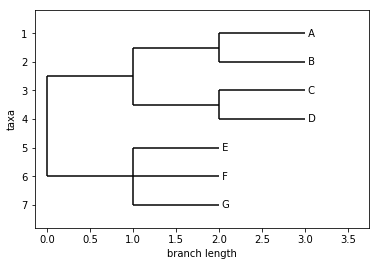

In [41]:
%matplotlib inline

from Bio import Phylo

# Cargamos el árbol desde el fichero
tree = Phylo.read("data/simple.dnd", "newick")

# El árbol tiene una raíz
tree.rooted = True

# Imprimimos la representación del árbol
print(tree)

# Creamos una imagen del árbol
Phylo.draw(tree)

### Ejercicio 8
Las posibilidades que ofrece la librería son muy variadas, podéis revisar la documentación oficial: http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc154

Diseñad vuestro propio árbol filogenético en algún formato reconocible por BioPython y representadlo de alguna de las formas posibles. Tened en cuenta que algunas opciones necesitarían librerías extra como networkx o graphviz. **En ese caso, no las utilicéis puesto que necesitaréis instalar esas librerías por separado**.

Tree(rooted=True, weight=1.0)
    Clade()
        Clade()
            Clade(name='0')
        Clade()
            Clade()
                Clade(name='A')
                Clade(name='B')
            Clade()
                Clade()
                    Clade(name='C')
                    Clade(name='D')
                    Clade(name='E')
                Clade()
                    Clade(name='E')
                    Clade(name='F')
                    Clade(name='G')
            Clade()
                Clade(name='H')
                Clade(name='I')
        Clade()
            Clade(name='1')


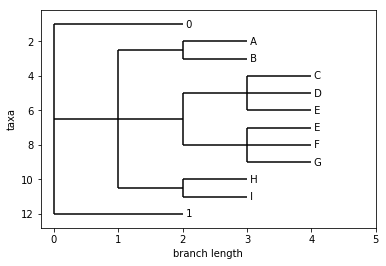

In [42]:
# Respuesta
%matplotlib inline

from Bio import Phylo

# Cargamos el árbol desde el fichero
tree = Phylo.read("data/simple2.dnd", "newick")

# El árbol tiene una raíz
tree.rooted = True

# Imprimimos la representación del árbol
print(tree)

# Creamos una imagen del árbol
Phylo.draw(tree)
